

# Project: Investigate a Dataset - No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset focuses on the issue of whether or not people show up for their appointment and gathers data from 110k medical appointments in Brazil. Each column contains a number of patient-related characteristics as follows :

  + PatientId            : Identification of a patient.
  + AppointmentID        : Identification of each appointment.
  + Gender               : Male or Female.
  + DataMarcacaoConsulta : The day of the actuall appointment, when they have to visit the doctor.
  + DataAgendamento      : The day someone called or registered the appointment, this is before appointment of course.
  + Age                  : How old is the patient.
  + Neighbourhood        : Where the appointment takes place.
  + Scholarship          : True of False ( Scholarship is "Bolsa Família" was a social welfare program of the Government of Brazil ).
  + Hipertension         : True or False
  + Diabetes             : True or False
  + Alcoholism           : True or False
  + Handcap              : True or False
  + SMS_received         : 1 or more messages sent to the patient.
  + No-show              : True or False.

### Question(s) for Analysis

1. What is the percentage of patients who fail to show up for their appointments?
2. Does a patient's age have any bearing on whether they keep an appointment?
3. Do patients with a scholorship show up more for their appointments?
4. Do patients with disabilities attend their appointments more  often?
5. Which gender has the highest likelihood of missing an appointment?
6. Do clients who receive SMS reminders show up more for their appointments?
7. Do patients who have scheduled appointments for the same day show up more for their appointments? 

In [28]:
# the packages used in this analysis 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
                        

In [119]:
# percentage function used in this analysis 
def percentage(dividend , divisor):
  percentage = 100 * dividend / divisor
  percentage = float('%.2f' % round(percentage, 2))
  return percentage 


In [120]:
# fonction to print the presentage
def print_percentage (the_percentage ):
 print(f"the percentage is {the_percentage}%.")

<a id='wrangling'></a>
## Data Wrangling



 This section explores the unprocessed data.

In [30]:
# loading the dataset
df_appointments = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df_appointments.head() 
# Renaming the dataset
df_app = df_appointments
df_app.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# Exploring the shape of the dataset
df_app.shape

(110527, 14)

This means there is 110527 entries and 14 columns as shown in the cell above .

In [5]:
# Searching for informations about the dataset
df_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The cell above shows the different types of values that each column contains ( float , ints and strings ) . Since there are 110527 entries and each column has 110527 non-null values, we can conclude that there are no null values in this dataset. 

In [6]:
# Searching for more informations about the dataset
df_app.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The information in the table above shows that the average patient age is 37, that the ages range from 0 to 115, and that because the dataset only contains true or false values, the maximum and lowest values for the other columns are 0 and 1, respectively.

In [7]:
# Searching for informations about the colomns
df_app.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

This database contains 62299 patients, 110527 appointments, male and female genders, 104 different ages, from 81 different neighborhoods, whether the patient showed up or not, received an SMS or not, and if he has a (scholarship, hypertension, diabetes, alcoholism, handicap) or not.


### Data Cleaning

 

This section will detail the adjustments made to this dataset to improve its efficiency.

To begin, let us lower case the names of the colomns to avoid errors caused by capital letters in a colomn name.

In [31]:
df_app.columns= df_app.columns.str.lower()
df_app.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


Let's rename the column "no-show" to "no_show" in order to prevent errors caused by the hyphen sign.

In [33]:
df_app.rename(columns = {'no-show':'no_show'}, inplace = True)
df_app[['appointmentid','no_show']].head()

,appointmentid,no_show
0,5642903,No
1,5642503,No
2,5642549,No
3,5642828,No
4,5642494,No


Let's search for more changes that can be made to this dataset.

In [12]:
df_app.describe()

,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


The "handcap" column displays a maximum value of 4, to make the analysis easier let's change the values to "True" and "False".

In [6]:
df_app['handcap'] = df_app['handcap'].replace({2:1 ,3:1,4:1})
df_app['handcap'].unique()

array([0, 1])

In this analysis, we'll pay particular attention to the day of the appointment and the date it was scheduled, so let's extract those dates.

In [16]:
# Let's see the colomns
df_app[['scheduledday','appointmentday']].head()

,scheduledday,appointmentday
0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z
1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z
2,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z
3,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z
4,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z


Both of the dates have an hour time associated to them, but our interest is in the date of scheduling and the appointment, so lets create these colomns.

In [18]:
# The colomn of the date of the appointment that patients called or registered for
df_app[['date_scheduled', 'hour']] = df_app['scheduledday'].str.split('T', expand=True)
df_app[['appointmentid', 'date_scheduled']].head()

,appointmentid,date_scheduled
0,5642903,2016-04-29
1,5642503,2016-04-29
2,5642549,2016-04-29
3,5642828,2016-04-29
4,5642494,2016-04-29


In [20]:
# The date of The day of the actuall appointment
df_app[['date_appointment','Hour']] = df_app['appointmentday'].str.split('T', expand=True)
df_app[['appointmentid', 'date_scheduled','date_appointment']].head()

,appointmentid,date_scheduled,date_appointment
0,5642903,2016-04-29,2016-04-29
1,5642503,2016-04-29,2016-04-29
2,5642549,2016-04-29,2016-04-29
3,5642828,2016-04-29,2016-04-29
4,5642494,2016-04-29,2016-04-29


In [22]:
# Let's search for the nature of the "date_scheduled" and "date_appointment" colomns
df_app[['date_scheduled','date_appointment']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 2 columns):
date_scheduled      110527 non-null object
date_appointment    110527 non-null object
dtypes: object(2)
memory usage: 1.7+ MB


As we can see, they are both of the string type when they should be of the datetime type.

In [26]:
# Let's change the type of the colomns to datetime
df_app['date_scheduled'] = pd.to_datetime(df_app['date_scheduled'], format='%Y-%m-%d')
df_app['date_appointment'] = pd.to_datetime(df_app['date_appointment'], format='%Y-%m-%d')
df_app[['date_scheduled','date_appointment']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 2 columns):
date_scheduled      110527 non-null datetime64[ns]
date_appointment    110527 non-null datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 1.7 MB


<a id='eda'></a>
## Exploratory Data Analysis



### Question 1 :
    What is the percentage of patients who fail to show up for their appointments?

Let's start by searching for distinct values in the 'no show' column.

In [76]:
df_app['no_show'].unique()

array(['No', 'Yes'], dtype=object)

Now, Let's find the percentage of patients that missed their scheduled appointments.

In [77]:
patients_noshow_count = df_app.query('no_show=="Yes"')['appointmentid'].count()
patients_noshow_count 

22319

In [111]:
# Number of patients 
N_patients = df_app['no_show'].count()  
# Percentage of patients who did not attended their appointments as scheduled
patients_show_percentage = percentage(patients_noshow_count,N_patients)
patients_show_percentage
print_percentage(patients_show_percentage)

the percentage is 20.19 %


Let's find the percentage of patients that didn't missed their scheduled appointments.

In [79]:
patients_show_count = df_app.query('no_show=="No"')['appointmentid'].count()
patients_show_count

88208

In [121]:
# Percentage of patients who attended their appointments as scheduled
patients_noshow_percentage = percentage(patients_show_count,N_patients)
patients_noshow_percentage
print_percentage(patients_noshow_percentage)

the percentage is 79.81%


Let's visualize the percentages :

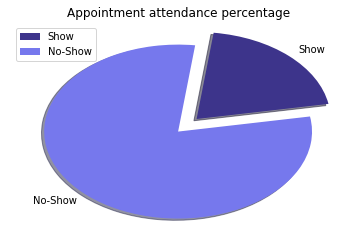

In [82]:
show_percentage = np.array([patients_show_percentage,patients_noshow_percentage])
Labels = ["Show", "No-Show"]
Explode = [0.2, 0]
Colors = ["#3D348B" , "#7678ED"]
plt.pie(show_percentage, labels = Labels , startangle = 10, explode=Explode , shadow = True , colors=Colors )
plt.legend()
plt.title('Appointment attendance percentage')
plt.show();

### Answer 1 :
    The percentage of patients that missed their scheduled appointments is 20.2% and the percentage of patients that didn't missed their scheduled appointments is 79.8%.

### Question 2 :
    Does a patient's age have any bearing on whether they keep an appointment?

First , let's lock for the unique ages in the dataset :

In [91]:
df_app['age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

The array above displays a range of ages, therefore we'll categorize them into "Children," "Youth," "Adults," and "Seniors":

First , the children categorie ages between 0 and 14 who attended the appointment:

In [92]:
patients_ch = df_app.query('age>=0 & age<=14 & no_show=="Yes"' )['appointmentid'].count()
patients_ch

4926

Then , the Youth categorie ages between 14 and 24 who attended the appointment:

In [93]:
patients_y = df_app.query('age>14 & age<=24 & no_show=="Yes"')['appointmentid'].count()
patients_y

3540

Next , the Adults categorie ages between 24 and 64 who attended the appointment:

In [94]:
patients_ad = df_app.query('age>24 & age<=64 & no_show=="Yes"')['appointmentid'].count()
patients_ad

11620

Finally , the Seniors categorie ages above 64 who attended the appointment:

In [95]:
patients_sn = df_app.query('age>64 & no_show=="Yes"')['appointmentid'].count()
patients_sn

2233

Let's visualize the results:

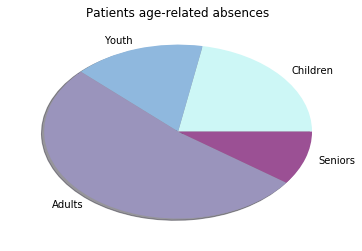

In [96]:
show_percentage = np.array([ patients_ch , patients_y , patients_ad , patients_sn ])
Labels = ["Children", "Youth" , "Adults" , "Seniors"]
Colors = ["#CDF7F6" , "#8FB8DE" , "#9A94BC" ,"#9B5094"]
plt.pie(show_percentage, labels = Labels , shadow = True , colors=Colors  )
plt.title('Patients age-related absences')
plt.show();

### Answer 2 :
    Adults are the more likely to fail to appear, followed by children, youth, and seniors.

### Question 3 :
    Do patients with a scholorship show up more for their appointments?

First , Let's study patients with scholarship :  

In [98]:
# patients with a scholarship
patients_w_s = df_app.query('scholarship==True')['appointmentid'].count()
patients_w_s

10861

In [99]:
# percentage of patients with scholarship who attend their visits
patients_s_show = df_app.query('scholarship==True & no_show=="No"')['appointmentid'].count()
pr_s_show = patients_s_show / patients_w_s * 100
pr_s_show

76.26369579228432

In [100]:
# percentage of patients with scholarship who did not attend their visits
patients_s_noshow = df_app.query('scholarship==True & no_show=="Yes"')['appointmentid'].count()
pr_s_noshow = patients_s_noshow / patients_w_s * 100
pr_s_noshow

23.73630420771568

Now, let us look at patients who do not have a scholarship: 

In [101]:
# patients who do not have a scholarship
patients_no_s = df_app.query('scholarship==False')['appointmentid'].count()
patients_no_s

99666

In [102]:
# percentage of patients who do not have a scholarship and attend their visits
patients_n_s_show = df_app.query('scholarship==False & no_show=="No"')['appointmentid'].count()
pr_patients_n_s_show = patients_n_s_show / patients_no_s * 100
pr_patients_n_s_show

80.19284409929163

In [103]:
# percentage of patients who do not have a scholarship and do not attend their visits
patients_n_s_noshow = df_app.query('scholarship==False & no_show=="Yes"')['appointmentid'].count()
pr_patients_n_s_noshow = patients_n_s_noshow / patients_no_s * 100
pr_patients_n_s_noshow

19.807155900708366

Let's visualize the results:

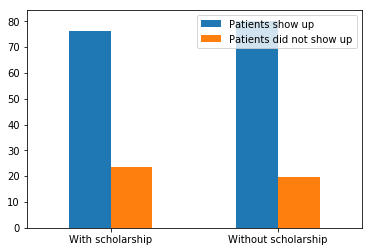

In [104]:
patients_show = [pr_s_show, pr_patients_n_s_show]
patients_no_show = [pr_s_noshow, pr_patients_n_s_noshow]
index = ['With scholarship', 'Without scholarship' ]
df = pd.DataFrame({'Patients show up ': patients_show,'Patients did not show up': patients_no_show}, index=index)
ax = df.plot.bar(rot=0)


### Answer 3 :
    The analysis above leads us to the conclusion that patients with scholarshps are more likely to miss their appointments .

### Question 4 :
    Do patients with disabilities attend their appointments more  often?

First , Let's study patients with a handicap : 

In [105]:
# patients with a handicap 
patients_w_hc = df_app.query('handcap==True')['appointmentid'].count()
patients_w_hc

2241

In [106]:
# percentage of patients with a handicap who did attend their visits
patients_hc_show = df_app.query('handcap==True & no_show=="No"')['appointmentid'].count()
pr_hc_show = patients_hc_show / patients_w_hc * 100
pr_hc_show

81.83846497099509

In [107]:
# percentage of patients with a handicap who did not attend their visits
patients_hc_noshow = df_app.query('handcap==True & no_show=="Yes"')['appointmentid'].count()
pr_hc_noshow = patients_hc_noshow / patients_w_hc * 100
pr_hc_noshow

18.16153502900491

Now , Let's study patients who are not handicapped:

In [108]:
# patients who are not handicapped 
patients_wt_hc = df_app.query('handcap==False')['appointmentid'].count()
patients_wt_hc

108286

In [109]:
# percentage of patients who are not handicapped and did attend their visits
patients_n_hc_show = df_app.query('handcap==False & no_show=="No"')['appointmentid'].count()
pr_patients_n_hc_show = patients_n_s_show /patients_wt_hc * 100
pr_patients_n_hc_show

73.80917200746173

In [110]:
# percentage of patients who are not handicapped and did not attend their visits
patients_n_hc_noshow = df_app.query('handcap==False & no_show=="Yes"')['appointmentid'].count()
pr_patients_n_hc_noshow = patients_n_hc_noshow / patients_wt_hc * 100
pr_patients_n_hc_noshow

20.235302809227417

Let's visualize the results:

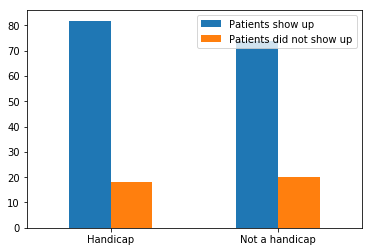

In [111]:
patients_show = [pr_hc_show, pr_patients_n_hc_show]
patients_no_show = [pr_hc_noshow, pr_patients_n_hc_noshow]
index = ['Handicap', 'Not a handicap' ]
df = pd.DataFrame({'Patients show up ': patients_show,'Patients did not show up': patients_no_show}, index=index)
ax = df.plot.bar(rot=0)

### Answer 4 :
    According to the analysis above , patients without a handicap are more likely to miss their appointments .

### Question 5 :
    Which gender has the highest likelihood of missing an appointment?

Let us calculate the percentage of female patients who missed their appointments :

In [112]:
#   Number of female patients 
patients_f = df_app.query('gender=="F"')['appointmentid'].count()
patients_f

71840

In [113]:
#   Number of female patients who missed their appointments 
patients_f_noshow = df_app.query('gender=="F" & no_show=="Yes"')['appointmentid'].count()
patients_f_noshow

14594

In [114]:
#   percentage of female patients who missed their appointments 
pr_patients_f_noshow = percentage(patients_f_noshow , patients_f)
pr_patients_f_noshow

20.31

    Let us calculate the percentage of male patients who missed their appointments :

In [115]:
#   Number of male patients 
patients_m = df_app.query('gender=="M"')['appointmentid'].count()
patients_m

38687

In [116]:
#   Number of male patients who missed their appointments
patients_m_noshow = df_app.query('gender=="M" & no_show=="Yes"')['appointmentid'].count()
patients_m_noshow

7725

In [117]:
#   percentage of female patients who missed their appointments 
pr_patients_m_noshow = percentage(patients_m_noshow , patients_m)
pr_patients_m_noshow

19.97

Let's vasualize the results :

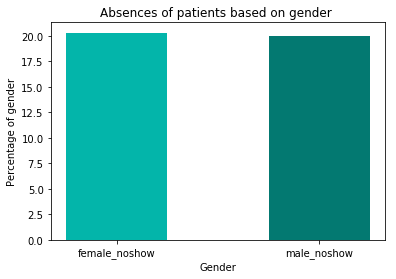

In [118]:
patients_no_show = ['female_noshow','male_noshow']
pr_patients_no_show = [pr_patients_f_noshow,pr_patients_m_noshow]
Colors = ["#03B5AA" , "#037971"]
plt.bar(patients_no_show,pr_patients_no_show,width=0.5,color=Colors)
plt.title('Absences of patients based on gender ')
plt.xlabel('Gender')
plt.ylabel('Percentage of gender');

### Answer 5 :
    We conclude from the analysis above that female patients are more likley to miss their appointments .

### Question 6 :
    Do clients who receive SMS reminders show up more for their appointments?

To start, Let's calculat the percentage of patients who got SMS reminders but did not attend their appointments :

In [120]:
#   Number of patients who got SMS reminders
patient_r_sms = df_app.query('sms_received==True')['appointmentid'].count()
patient_r_sms

35482

In [121]:
#   patients who got SMS reminders and not attend their appointments 
patient_r_noshow  = df_app.query('sms_received==True & no_show=="Yes"')['appointmentid'].count()
patient_r_noshow

9784

In [122]:
#   percentage of patients who got SMS reminders and not attend their appointments 
pr_patients_r_noshow = patient_r_noshow / patient_r_sms * 100
pr_patients_r_noshow

27.574544839637

Now, Let's calculat the percentage of patients who did not receive SMS reminders and did not attend their appointments :

In [123]:
#  patients who did not receive SMS reminders
patient_no_r = df_app.query('sms_received==False')['appointmentid'].count()
patient_no_r

75045

In [124]:
#  patients who did not receive SMS reminders and did not attend their appointments
patient_no_r_noshow  = df_app.query('sms_received==False & no_show=="Yes"')['appointmentid'].count()
patient_no_r_noshow

12535

In [125]:
#   percentage of patients who did not receive SMS reminders and did not attend their appointments
pr_patients_no_r_noshow = patient_no_r_noshow / patient_r_sms * 100
pr_patients_no_r_noshow

35.327771827969116

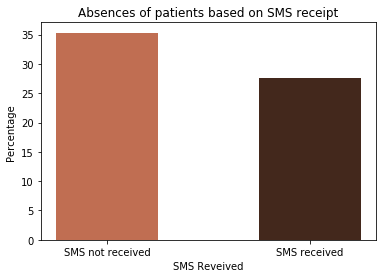

In [126]:
conditions = np.array(['SMS received','SMS not received'])
patients_no_show = [pr_patients_r_noshow,pr_patients_no_r_noshow]
Colors = ["#43281C" , "#C06E52"]
plt.bar(conditions,patients_no_show,width=0.5,color=Colors)
plt.title('Absences of patients based on SMS receipt')
plt.xlabel('SMS Reveived')
plt.ylabel('Percentage ');

### Answer 6 :
    We conclude from the analysis above that patients who did not receive SMS reminders are more likely to miss their               appointments .

### Question 7 :
    Do patients who have scheduled appointments for the same day show up more for their appointments? 

To Begin , Let's calculat the percentage of patients who have scheduled appointments for the same day but did not attend their appointments :

In [27]:
# patients who have scheduled appointments for the same day
df_patients_sameday=df_app.query('date_scheduled==date_appointment')
df_patients_sameday[['appointmentid', 'date_scheduled','date_appointment']].head(6)

,appointmentid,date_scheduled,date_appointment
0,5642903,2016-04-29,2016-04-29
1,5642503,2016-04-29,2016-04-29
2,5642549,2016-04-29,2016-04-29
3,5642828,2016-04-29,2016-04-29
4,5642494,2016-04-29,2016-04-29
8,5638447,2016-04-29,2016-04-29


In [28]:
# Number of patients who have scheduled appointments for the same day
patients_sameday = df_patients_sameday['appointmentid'].count()
patients_sameday 

38563

In [29]:
# Number of patients who have scheduled appointments for the same day but did not attend their appointments
patients_sameday_noshow = df_patients_sameday.query('no_show=="Yes"')['appointmentid'].count()
patients_sameday_noshow

1792

In [30]:
# percentage of patients who have scheduled appointments for the same day but did not attend their appointments
pr_patients_sameday =patients_sameday_noshow / patients_sameday * 100
pr_patients_sameday

4.6469413686694505

Now , Let's calculat the percentage of patients who did not schedule appointments for the same day and did not attend their appointments :

In [31]:
# patients who did not schedule appointments for the same day
df_patients_not_sameday=df_app.query('date_scheduled!=date_appointment')
df_patients_not_sameday[['appointmentid', 'date_scheduled','date_appointment']].head(6)

,appointmentid,date_scheduled,date_appointment
5,5626772,2016-04-27,2016-04-29
6,5630279,2016-04-27,2016-04-29
7,5630575,2016-04-27,2016-04-29
9,5629123,2016-04-27,2016-04-29
10,5630213,2016-04-27,2016-04-29
11,5620163,2016-04-26,2016-04-29


In [32]:
# Number of patients who did not schedule appointments for the same day
patients_not_sameday = df_patients_not_sameday['appointmentid'].count()
patients_not_sameday 

71964

In [33]:
# Number of patients who did not schedule appointments for the same day but did not attend their appointments
patients_not_sameday_noshow = df_patients_not_sameday.query('no_show=="Yes"')['appointmentid'].count()
patients_not_sameday_noshow

20527

In [34]:
#   percentage of patients who did not schedule appointments for the same day but did not attend their appointments
pr_patients_not_sameday_noshow = patients_not_sameday_noshow / patients_not_sameday * 100
pr_patients_not_sameday_noshow

28.523984214329385

Let's visualize the results :

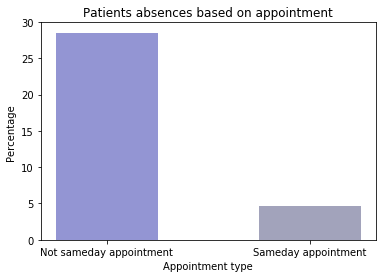

In [35]:

appointment_day = np.array(['Sameday appointment','Not sameday appointment'])
patients_no_show = [pr_patients_sameday,pr_patients_not_sameday_noshow]
Colors = ["#A2A3BB" , "#9395D3"]
plt.bar(appointment_day,patients_no_show,width=0.5,color=Colors)
plt.title('Patients absences based on appointment')
plt.xlabel('Appointment type')
plt.ylabel('Percentage ');

### Answer 7 :
    We conclude from the analysis above that patients who have scheduled appointments for the same day are more likely to   show up for their appointments .

<a id='conclusions'></a>
## Conclusions


After analyzing this dataset that gathers data from 110k medical appointments in Brazil , we found that 20% of patients didn't show up for the appointements that they schedueled due to a number of factors as fellows :

+ **Age** : We found that adults (age between 24 and 64) are more likely to miss their appointments fellowed by children (age between 0 and 14) then youth (age between 14 and 24) and then seniors (age above 64).
+ **Gender** : Female patients are more likley to miss their appointments.
+ **SMS reception** : Patients that receive a SMS remanding them of their appointment are more likely to show up for it .
+ **Date of the appointment** : Patients that scheduled their appointments for the same day are more likely to attend.
+ **Handicap and Scholarship**  : Having a scholarship or having a handicap has no effect on whether a patient show up or not .

 **Limitations :**
During the analysis of this dataset, various limitations emerged , for example :
+ The social status of the patients ( upper class , working class , or middle class) is not giving which might be a role in their absenteeism.
+ the marital status of the patients ( single, married, widowed, divorced) is also not giving which might be a role in their absenteeism.
